In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random as rd
from tqdm import tqdm

In [2]:
path = 'StarLightCurves/StarLightCurves_TRAIN.txt'
data_with_label = pd.read_fwf(path, header=None)
data_without_label = data_with_label.iloc[:, 1:]
sample = data_without_label.iloc[0]  # first sample of length 1024
sample = sample.tolist()

In [3]:
data_with_label.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,3.0,0.537303,0.531103,0.528503,0.529403,0.533603,0.540903,0.551103,0.564003,0.579603,...,0.547103,0.546903,0.545903,0.543903,0.541003,0.537203,0.532303,0.526403,0.519503,0.511403
1,3.0,0.588398,0.593898,0.599098,0.604098,0.608798,0.613397,0.617797,0.622097,0.626097,...,0.228799,0.237399,0.246499,0.256199,0.266499,0.277399,0.288799,0.300899,0.313599,0.326899
2,1.0,-0.049900,-0.041500,-0.033400,-0.025600,-0.018100,-0.010800,-0.003800,0.003000,0.009600,...,-0.185601,-0.173801,-0.161601,-0.149201,-0.136401,-0.123201,-0.109701,-0.095901,-0.081701,-0.067100
3,3.0,1.337005,1.319805,1.302905,1.286305,1.270005,1.254005,1.238304,1.223005,1.208104,...,1.278905,1.288905,1.298505,1.307705,1.316505,1.324905,1.332805,1.340205,1.347005,1.353205
4,3.0,0.769801,0.775301,0.780401,0.785101,0.789401,0.793301,0.796801,0.799901,0.802601,...,0.740801,0.742401,0.744501,0.747301,0.750701,0.754801,0.759501,0.765001,0.771301,0.778401


In [4]:
data_without_label.head()

,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0.537303,0.531103,0.528503,0.529403,0.533603,0.540903,0.551103,0.564003,0.579603,0.597603,...,0.547103,0.546903,0.545903,0.543903,0.541003,0.537203,0.532303,0.526403,0.519503,0.511403
1,0.588398,0.593898,0.599098,0.604098,0.608798,0.613397,0.617797,0.622097,0.626097,0.630097,...,0.228799,0.237399,0.246499,0.256199,0.266499,0.277399,0.288799,0.300899,0.313599,0.326899
2,-0.049900,-0.041500,-0.033400,-0.025600,-0.018100,-0.010800,-0.003800,0.003000,0.009600,0.015900,...,-0.185601,-0.173801,-0.161601,-0.149201,-0.136401,-0.123201,-0.109701,-0.095901,-0.081701,-0.067100
3,1.337005,1.319805,1.302905,1.286305,1.270005,1.254005,1.238304,1.223005,1.208104,1.193504,...,1.278905,1.288905,1.298505,1.307705,1.316505,1.324905,1.332805,1.340205,1.347005,1.353205
4,0.769801,0.775301,0.780401,0.785101,0.789401,0.793301,0.796801,0.799901,0.802601,0.805101,...,0.740801,0.742401,0.744501,0.747301,0.750701,0.754801,0.759501,0.765001,0.771301,0.778401


In [5]:
len(data_with_label)

1000

In [6]:
sample

[0.53730293,
 0.53110294,
 0.52850294,
 0.52940294,
 0.53360294,
 0.54090293,
 0.55110293,
 0.56400292,
 0.57960292,
 0.59760291,
 0.61790291,
 0.6402029,
 0.66440289,
 0.69040288,
 0.71800287,
 0.74700286,
 0.77730285,
 0.80860284,
 0.84080283,
 0.87370281,
 0.9072028,
 0.94110279,
 0.97520278,
 1.0094028,
 1.0434028,
 1.0772027,
 1.1105027,
 1.1423027,
 1.1730027,
 1.2023027,
 1.2302027,
 1.2564027,
 1.2807027,
 1.3031027,
 1.3235027,
 1.3416026,
 1.3573026,
 1.3707026,
 1.3817026,
 1.3901026,
 1.3960026,
 1.3993026,
 1.4000026,
 1.3982026,
 1.3939026,
 1.3871026,
 1.3779026,
 1.3664026,
 1.3527026,
 1.3370026,
 1.3194027,
 1.3001027,
 1.2792027,
 1.2569027,
 1.2334027,
 1.2089027,
 1.1836027,
 1.1577027,
 1.1313027,
 1.1048027,
 1.0781027,
 1.0517028,
 1.0256028,
 1.0000028,
 0.97510278,
 0.95110279,
 0.92800279,
 0.9062028,
 0.88570281,
 0.86650282,
 0.84890282,
 0.83300283,
 0.81870283,
 0.80610284,
 0.79530284,
 0.78630285,
 0.77910285,
 0.77360285,
 0.76980285,
 0.76770285,
 0.7

In [7]:
len(sample)

1024

In [8]:
path = 'StarLightCurves/StarLightCurves_TEST.txt'
data_test = pd.read_fwf(path, header=None)
data_test_without_label = data_test.iloc[:, 1:]
data_test_without_label.head()

,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,-0.569701,-0.567901,-0.565901,-0.563701,-0.561501,-0.559101,-0.556701,-0.554101,-0.551501,-0.548701,...,-0.518401,-0.521501,-0.525101,-0.529001,-0.533201,-0.537901,-0.543001,-0.548501,-0.554501,-0.560801
1,-0.528303,-0.520903,-0.512903,-0.504303,-0.494903,-0.485003,-0.474403,-0.463203,-0.451303,-0.438903,...,-0.673504,-0.670104,-0.664604,-0.656704,-0.646504,-0.633804,-0.618604,-0.600603,-0.579903,-0.556303
2,0.164201,0.181901,0.198601,0.214301,0.229001,0.242701,0.255501,0.267401,0.278401,0.288601,...,0.233501,0.225401,0.217301,0.209201,0.201101,0.193101,0.185201,0.177301,0.169401,0.161701
3,0.321800,0.327001,0.332401,0.337901,0.343501,0.349201,0.355001,0.360801,0.366701,0.372701,...,0.262200,0.268300,0.274400,0.280500,0.286600,0.292600,0.298600,0.304600,0.310500,0.316400
4,-0.461699,-0.464499,-0.466499,-0.467499,-0.467699,-0.467099,-0.465699,-0.463499,-0.460599,-0.457099,...,-0.465999,-0.465899,-0.466399,-0.467399,-0.468999,-0.471099,-0.473799,-0.477099,-0.480999,-0.485499


In [9]:
def fig_ax(figsize=(15, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.autoscale(enable=True, axis='x', tight=True)
    return fig, ax

Text(0.5, 1.0, 'Given signal')

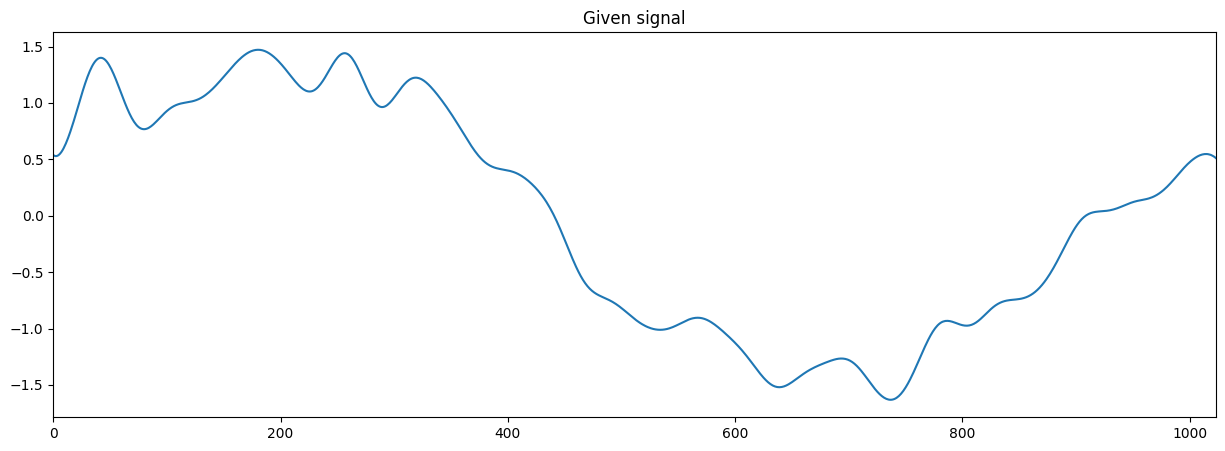

In [10]:
fig, ax = fig_ax()
ax.plot(sample)
plt.title("Given signal")

In [11]:
# Adjust parameters
w = 5
l = 4
c = 3
mean = False

In [12]:
def sliding_windows(sample, w):
    'returns list of the n-w sliding windows of length w of a signal'
    n = len(sample)
    s = []
    for i in range(n-w):
        s.append(sample[i:i+w])
    std=np.std(s) #normalisation
    return s/std

In [13]:
def DFT(sample, l, mean):
    n = len(sample)
    dft = []
    if mean:
        sample=sample-np.mean(sample)
    num = int(round(l/2))
    for u in range(num):
        xu = (1/n) * sum(sample[x]*np.exp(- 2j * np.pi*u*x/n)
                         for x in range(n))
        dft.append(xu.real)
        dft.append(xu.imag)
    return dft

In [14]:
def DFT_A(sample,w, l, mean):
    'returns the matrix A for which each lign i is the DFT of the window i of a signal'
    if mean:
        sample=sample-np.mean(sample)

    num = int(round(l/2))
    windows=sliding_windows(sample,w)
    n = len(sample)

    v=np.exp( 2j * np.pi * np.arange(num) /n)
    V=np.diag(v)
    
    dft0=[]
    for u in range(num):
        xu = (1/w) * sum(sample[x]*np.exp(- 2j * np.pi*u*x/w)
                         for x in range(w))
        dft0.append(xu)

    A=np.array(dft0)
    A=A[np.newaxis,:]
    newcol=np.zeros((1,num))
    for i in range(1,n-w):
        diff=np.ones((1,num))*(sample[i+w]-sample[i])
        newcol= np.dot(A[i-1,:]+diff,V)
        A=np.vstack((A,newcol))
    
    B= np.zeros((A.shape[0],2*num))
    B[:, 0::2] = A.real
    B[:, 1::2] = A.imag
    return B

In [15]:
def MCB(sample, w, l, c, mean):
    windows = sliding_windows(sample, w)
    # A = [DFT(window, l, mean)for window in windows]
    # A = np.array(A)
    A=DFT_A(sample,w,l,mean)
    n, l = A.shape

    breakpoints = []

    for j in range(l):
        sorted_column = np.sort(A[:, j])
        bin_size = n // (c + 1)
        bin_indices = [i * bin_size for i in range(1, c + 1)]
        column_breakpoints = [sorted_column[i] for i in bin_indices]
        breakpoints.append(column_breakpoints)
    return breakpoints, A



In [16]:

def window_to_word(sample, w, l, c, mean):
    breakpoints, A = MCB(sample, w, l, c, mean)
    n, l = A.shape

    alphabet = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
    B_list = []

    for i in range(n):
        row_symbols = []
        for j in range(l):
            column_breakpoints = breakpoints[j]
            bin_index = np.digitize(A[i, j], column_breakpoints, right=True)
            bin_index = min(bin_index, c)
            row_symbols.append(alphabet[bin_index])
        B_list.append(''.join(row_symbols))
    B = np.array(B_list, dtype='<U101')
    return B

In [17]:
def BOSSTransform(sample, w, l, c, mean):
    words = window_to_word(sample, w, l, c, mean)
    unique_words = np.unique(words)
    boss = {value: 0 for value in unique_words}
    lastword = None
    for word in words:
        if word != lastword:
            boss[word] += 1
        lastword = word
    # print(boss)
    return boss

In [18]:
def plot_hist(n):
    fig, axs = plt.subplots(n, 2, figsize=(10, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, n))
    for i in range(n):
        sample = data_without_label.iloc[rd.randint(0,len(data_without_label))]  # first sample of length 1024
        sample = sample.tolist()
        boss = BOSSTransform(sample, w, l, c, mean)
        labels = list(boss.keys())
        values = list(boss.values())

        axs[i, 0].plot(sample, color=colors[i])
        axs[i, 0].set_xlabel('Temps')
        axs[i, 0].set_ylabel('Amplitude')
        axs[i, 0].set_title('Signal')

        axs[i, 1].bar(labels, values, color=colors[i])
        axs[i, 1].set_xlabel('Mot')
        axs[i, 1].set_ylabel('Fréquence')
        axs[i, 1].set_title('Histogramme des fréquences des mots')
        axs[i, 1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

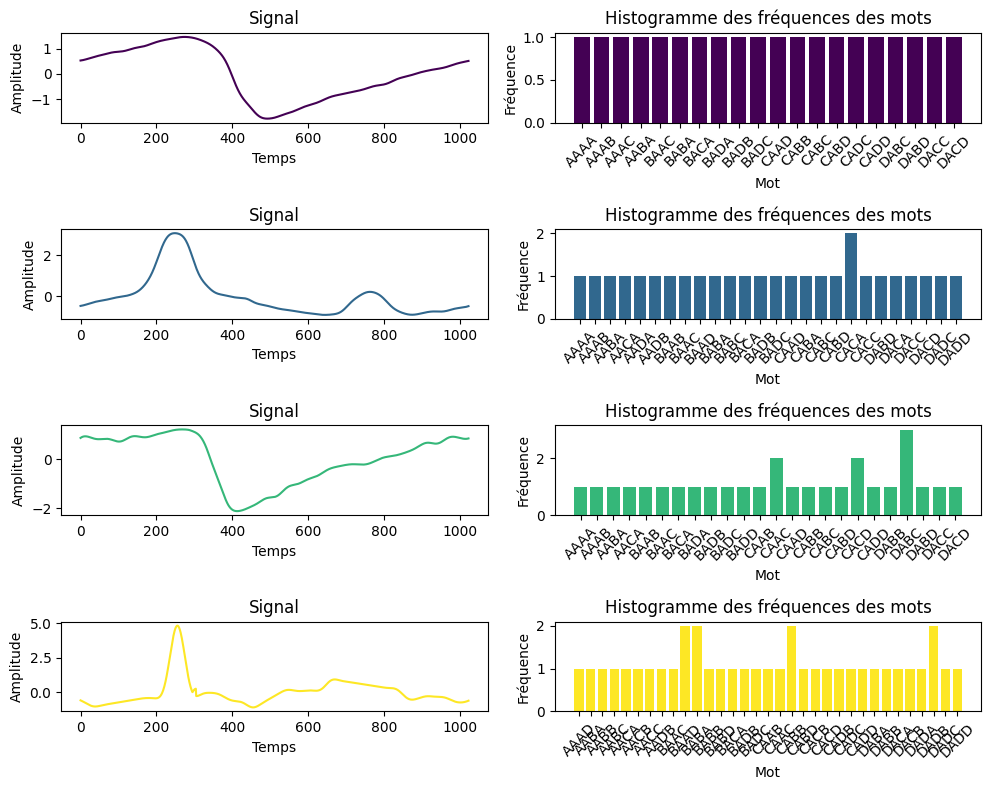

In [19]:

plot_hist(4)


In [20]:
# Algo 2
def boss_distance(h1,h2):
    dist=0
    for word in h1.keys():
        if word in h2.keys():
            dist+=(h1[word]-h2[word])**2
        else:
            dist+=h1[word]**2
    return dist

In [22]:
# Algo 2 Chiara
def TS_predict(test, samples, w,l,c):
    bestDist=np.inf
    bestTs=None
    n=len(samples)
    test = test.tolist()
    h= BOSSTransform(test, w, l, c, mean=False)
    for i in range(n):
        signal=samples.iloc[i]
        signal = signal.tolist()
        hi=BOSSTransform(signal, w, l, c, mean=False)
        dist=boss_distance(h,hi)
        if dist < bestDist:
            bestDist = dist
            bestTs = signal
            bestindex = i
    return bestTs,bestindex

In [26]:
# Algo 2 Pierre
histograms = []
for i in range(len(data_without_label)):
    histograms.append(BOSSTransform(data_without_label.iloc[i].tolist(),10,l,c, mean=False))

In [27]:
def TS_predict(qId, samples_train, histograms, w, l, c):
    bestDist=np.inf
    bestTs=None
    signal_to_predict = qId.tolist()
    h= BOSSTransform(signal_to_predict, w, l, c, mean=True)
    for i in range(len(samples_train)):
        hi=histograms[i]
        dist=boss_distance(h,hi)
        if dist < bestDist:
            bestDist = dist
            bestTs = samples_train.iloc[i].tolist()
    return (bestTs,i)

In [29]:
counter=0
for i in range(len(data_test)):
    if data_test.iloc[i,0]==1.0:
        nn , index = TS_predict(data_test_without_label.iloc[i],data_without_label,histograms, 10,l,c)
        # nn , index = TS_predict(data_test_without_label.iloc[i], data_without_label, 500,l,c)
        print(f"i={i}, predindex = {index}")
        print(f"Correct label = {data_test.iloc[i,0]}, Pred label = {data_with_label.iloc[index,0]}")
        if data_with_label.iloc[index,0] == data_test.iloc[i,0]:
            print('good')
counter

i=3, predindex = 999
Correct label = 1.0, Pred label = 3.0
i=15, predindex = 999
Correct label = 1.0, Pred label = 3.0
i=19, predindex = 999
Correct label = 1.0, Pred label = 3.0
i=20, predindex = 999
Correct label = 1.0, Pred label = 3.0
i=25, predindex = 999
Correct label = 1.0, Pred label = 3.0
i=27, predindex = 999
Correct label = 1.0, Pred label = 3.0
i=41, predindex = 999
Correct label = 1.0, Pred label = 3.0
i=45, predindex = 999
Correct label = 1.0, Pred label = 3.0
i=46, predindex = 999
Correct label = 1.0, Pred label = 3.0
i=52, predindex = 999
Correct label = 1.0, Pred label = 3.0
i=53, predindex = 999
Correct label = 1.0, Pred label = 3.0
i=60, predindex = 999
Correct label = 1.0, Pred label = 3.0
i=61, predindex = 999
Correct label = 1.0, Pred label = 3.0
i=69, predindex = 999
Correct label = 1.0, Pred label = 3.0
i=70, predindex = 999
Correct label = 1.0, Pred label = 3.0
i=92, predindex = 999
Correct label = 1.0, Pred label = 3.0
i=94, predindex = 999
Correct label = 1.0

0

3.0
3.0


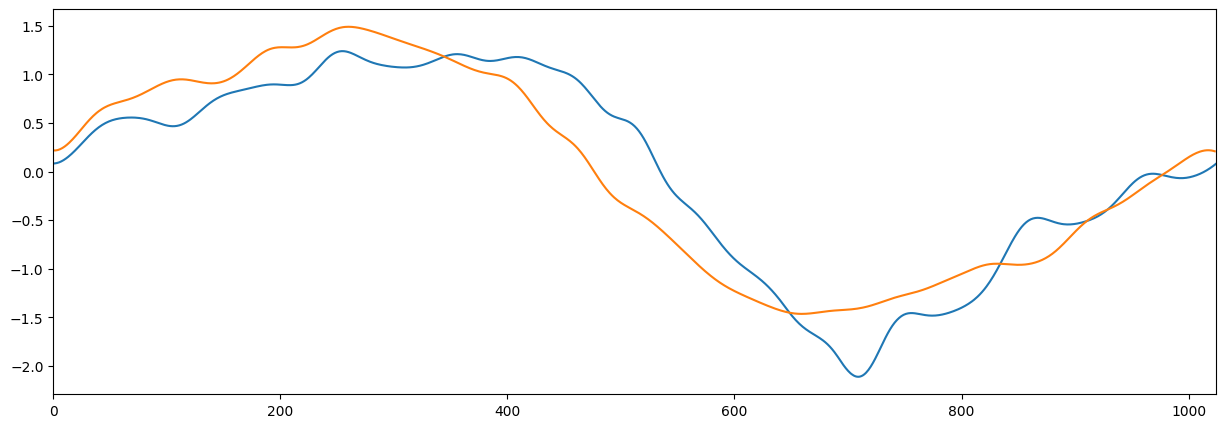

In [33]:
nn,index = TS_predict(data_test_without_label.iloc[190],data_without_label, histograms,10,l,c)
fig, ax = fig_ax()
ax.plot(data_test_without_label.iloc[190])
ax.plot(nn)
print(data_test.iloc[190,0])
print(data_with_label.iloc[index,0])

In [34]:
def shortenHistogram(hist,f):
    shortenedHistograms = []
    for i in range(len(hist)):
        current_histogram = hist[i]
        current_words = list(current_histogram.keys())
        while f < len(current_words[0]):
            new_histogram = {}
            current_words = list(current_histogram.keys())
            for word in current_words:
                if word[:-1] not in new_histogram.keys():
                    new_histogram[word[:-1]] = current_histogram[word]
                else:
                    new_histogram[word[:-1]] += current_histogram[word]
            current_histogram = new_histogram
            current_words = list(current_histogram.keys())
            # print(current_histogram)
        shortenedHistograms.append(current_histogram)
    return shortenedHistograms

In [35]:
# Test fonction shortenHistogram
his = [
    {'AAA':1,'AAB':0,'ABA':1, 'ABB':0,'BAA':1,'BAB':2,'BBA':2,'BBB':2},
    {'AAA':3,'AAB':2,'BBA':1,'BBB':3},
]
shortenHistogram(his,1)

[{'A': 2, 'B': 7}, {'A': 5, 'B': 4}]

In [36]:
# Renvoyer le label
def labels(df_row_with_label):
    return df_row_with_label[0]

In [37]:
labels(data_with_label.iloc[1])

3.0

In [38]:
# Dataframe avec les 50 premiers samples
data_with_label_short = data_with_label.iloc[0:50,:]
data_without_label_short = data_without_label.iloc[0:50,:]

In [39]:
# Algo 3 -- Tests avec w entre 150 et 155
def fit(labelled_data,mean):
    hist = []
    scores = []
    maxF = 8
    minSize = 150
    maxSize = 155
    c = 4
    unlabelled_data = labelled_data.iloc[:, 1:]
    for w in range(maxSize, minSize-1, -1):
        print(f"w = {w}")
        for i in tqdm(range(len(labelled_data))):
            hist.append(BOSSTransform(unlabelled_data.iloc[i].tolist(),w,maxF,c,mean))
        # print(f"len hist: {len(hist)}")
        bestCor = 0
        bestF = 0
        for f in range(2,maxF+1,2):
            histShort = shortenHistogram(hist, f)
            # print(f"Shortened first histogram for f={f} : {histShort[0]}")
            correct = 0
            for index_qId in range(len(labelled_data)):
                best,index_best = TS_predict(unlabelled_data.iloc[index_qId], unlabelled_data.drop(index=index_qId),histShort,w,f,c)
                # print(f"1NN: {best}")
                print(f"Predicted Label {labels(labelled_data.iloc[index_best])}: , Correct Label : {labels(labelled_data.iloc[index_qId])}")
                if labels(labelled_data.iloc[index_best]) == labels(labelled_data.iloc[index_qId]):
                    correct += 1
            if correct > bestCor:
                bestCor = correct
                bestF = f
        scores.append((correct,w,bestF,hist))
    return scores

In [41]:
scores = fit(data_with_label_short,mean=False)

w = 155


100%|██████████| 50/50 [00:03<00:00, 13.11it/s]


Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 1.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 1.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 1.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted L

100%|██████████| 50/50 [00:03<00:00, 13.17it/s]


Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 1.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 1.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 1.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted L

100%|██████████| 50/50 [00:03<00:00, 13.54it/s]


Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 1.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 1.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 1.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted L

100%|██████████| 50/50 [00:03<00:00, 13.06it/s]


Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 1.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 1.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 1.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted L

100%|██████████| 50/50 [00:03<00:00, 13.55it/s]


Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 1.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 1.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 1.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted L

100%|██████████| 50/50 [00:03<00:00, 13.42it/s]


Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 1.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 1.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted Label 1.0: , Correct Label : 3.0
Predicted Label 1.0: , Correct Label : 1.0
Predicted Label 1.0: , Correct Label : 2.0
Predicted L

In [42]:
# Scores identiques à chaque fois
for i in range(len(scores)):
    print(scores[i][0])

10
10
10
10
10
10


In [ ]:
# Algo 4
def predictEnsemble(qId,samples,windowScores):
    FACTOR = 0.92
    windowLabels = []
    maxCorrect = max(correct for (correct,_,_,_) in windowScores)
    for (correct,_,_,histograms) in windowScores:
        if (correct > maxCorrect * FACTOR):
            pred, index_pred = TS_predict(qId,samples,histograms)
            windowLabels.append(labels(samples.iloc[index_pred]))
    pass 